In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [14]:
data_full = pd.DataFrame(iris.data, columns=iris.feature_names)
data_sepal = data_full.filter(items = ['sepal length (cm)', 'sepal width (cm)'])
variety = iris.target

In [48]:
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [15]:
data_sepal.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [6]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [32]:
# разделяем выборку на тренировочную и тестовую
from sklearn.model_selection import train_test_split
XSep_train, XSep_test, ySep_train, ySep_test = train_test_split(data_sepal, variety, test_size=0.25)
XFull_train, XFull_test, yFull_train, yFull_test = train_test_split(data, variety, test_size=0.25)

In [33]:
# импортируем LDA-функционал
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [34]:
ldaSep = LinearDiscriminantAnalysis()
ldaFull = LinearDiscriminantAnalysis()

In [35]:
# обучаем данные
ldaSep.fit(XSep_train, ySep_train)
ldaFull.fit(XFull_train, yFull_train)

LinearDiscriminantAnalysis()

In [36]:
# делаем прогноз на тестовой выборке только для sepal
ldaSep.predict(XSep_test)

array([2, 1, 1, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 0, 0, 1, 2, 2, 2, 2, 0, 0, 2, 1, 1, 0, 2])

In [37]:
# делаем прогноз на тестовой выборке только для полных данных
ldaFull.predict(XFull_test)

array([1, 2, 2, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 0, 2, 0, 1, 1,
       0, 0, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 0, 1, 2, 1])

In [28]:
# смотрим разницу факта и прогноза только для sepal
resultSep = pd.DataFrame([ySep_test, ldaSep.predict(XSep_test)]).T
resultSep

,0,1
0,0,0
1,0,0
2,1,2
3,0,0
4,0,0
5,2,1
6,2,1
7,2,2
8,1,2
9,2,2


In [38]:
# смотрим разницу факта и прогноза для полных данных
resultFull = pd.DataFrame([yFull_test, ldaFull.predict(XFull_test)]).T
resultFull

,0,1
0,1,1
1,2,2
2,2,2
3,2,2
4,0,0
5,2,2
6,1,1
7,1,1
8,2,2
9,2,2


In [39]:
from sklearn.metrics import accuracy_score

In [40]:
accuracy_score(ySep_test, ldaSep.predict(XSep_test))

0.7631578947368421

In [41]:
accuracy_score(yFull_test, ldaFull.predict(XFull_test))

0.9473684210526315

Подсчитано два варианта, так как не доконца понятно сформулирована задача. Если в данных сразу оставлять только колонки 
sepal_length и sepal_width, то точность предсказания падает очень существенно

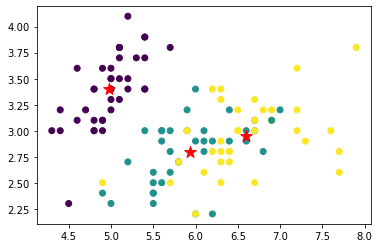

In [46]:
#Выводим визуализацию только для sepal
plt.scatter(XSep_train['sepal length (cm)'], XSep_train['sepal width (cm)'], c=ySep_train)
plt.scatter(ldaSep.means_[:, 0], ldaSep.means_[:, 1], c='r', s=150, marker='*')
plt.show()

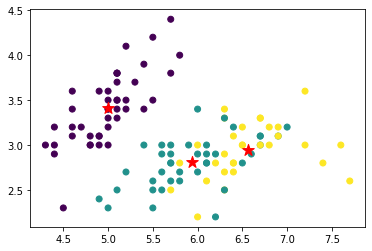

In [47]:
#Выводим визуализацию только для полных данных
plt.scatter(XFull_train['sepal length (cm)'], XFull_train['sepal width (cm)'], c=yFull_train)
plt.scatter(ldaFull.means_[:, 0], ldaFull.means_[:, 1], c='r', s=150, marker='*')
plt.show()

Два класса достаточно сильно пересекаются, что говорит о том, что цветы с похожими размерами чашелистика есть и в том и в другом классе.

In [113]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [114]:
X = data_sepal.to_numpy()

In [115]:
X

array([[5.1, 3.5],
       [4.9, 3. ],
       [4.7, 3.2],
       [4.6, 3.1],
       [5. , 3.6],
       [5.4, 3.9],
       [4.6, 3.4],
       [5. , 3.4],
       [4.4, 2.9],
       [4.9, 3.1],
       [5.4, 3.7],
       [4.8, 3.4],
       [4.8, 3. ],
       [4.3, 3. ],
       [5.8, 4. ],
       [5.7, 4.4],
       [5.4, 3.9],
       [5.1, 3.5],
       [5.7, 3.8],
       [5.1, 3.8],
       [5.4, 3.4],
       [5.1, 3.7],
       [4.6, 3.6],
       [5.1, 3.3],
       [4.8, 3.4],
       [5. , 3. ],
       [5. , 3.4],
       [5.2, 3.5],
       [5.2, 3.4],
       [4.7, 3.2],
       [4.8, 3.1],
       [5.4, 3.4],
       [5.2, 4.1],
       [5.5, 4.2],
       [4.9, 3.1],
       [5. , 3.2],
       [5.5, 3.5],
       [4.9, 3.6],
       [4.4, 3. ],
       [5.1, 3.4],
       [5. , 3.5],
       [4.5, 2.3],
       [4.4, 3.2],
       [5. , 3.5],
       [5.1, 3.8],
       [4.8, 3. ],
       [5.1, 3.8],
       [4.6, 3.2],
       [5.3, 3.7],
       [5. , 3.3],
       [7. , 3.2],
       [6.4, 3.2],
       [6.9,

In [116]:
# fit-transform сразу обучается и преобразует данные
X_scaled = scaler.fit_transform(X)

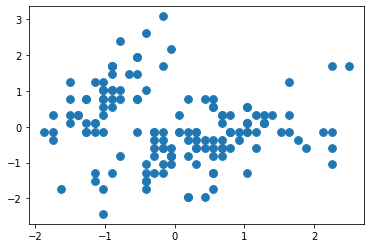

In [117]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [118]:
from sklearn.cluster import KMeans

In [119]:
# строим график локтя

# создаем список для инерции
k_inertia = []
# задаем диапазон кластеров
ks = range(1, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    # добавляем инерцию каждой модели в список
    k_inertia.append(clf_kmeans.inertia_)

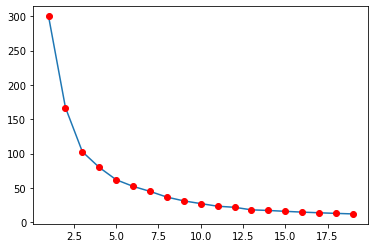

In [120]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

In [131]:
# явно указываем количество кластеров
kmeans = KMeans(n_clusters=3)
# fit_predict обучается на данных и каждому объекту присваивает кластер
clusters = kmeans.fit_predict(X_scaled)
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0])

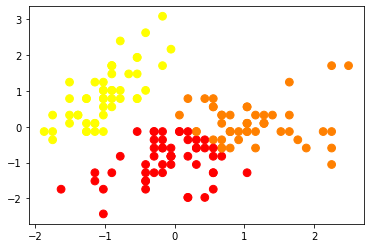

In [132]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

Я бы сказал, что достаточно 3 кластера.При них группы разделены достаточно хорошо и нет пересечений